In [1]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers==3 
!pip install torch

!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-3.0.0-py3-none-any.whl (754 kB)
  Using cached tokenizers-0.8.0rc4-cp37-cp37m-manylinux1_x86_64.whl (3.0 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.10.3
    Uninstalling tokenizers-0.10.3:
      Successfully uninstalled tokenizers-0.10.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.8.1
    Uninstalling transformers-4.8.1:
      Successfully uninstalled transformers-4.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviou

In [2]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [3]:
##GPU 사용 시
device = torch.device("cuda:0")

bertmodel, vocab = get_pytorch_kobert_model()

using cached model. /content/.cache/kobert_v1.zip
using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/My Drive/nlp_liflow/

/content/drive/My Drive/nlp_liflow


In [6]:
!ls

자연어처리_1.ipynb		  item_all_GloVe_DBSCAN.csv
자연어처리_2.ipynb		  item_all_glove_k-means.csv
all_df_with_tokens.csv		  ko.bin
all_sen.csv			  list_to_csv.csv
cc.ko.300.bin.gz		  nlp_tokenizer.ipynb
df_all				  스포츠_sen.csv
df_all.csv			  sen.csv
df_all_GloVe.csv		  sen_preprocessig.csv
df_all_tfidf.csv		  스포츠_sen_prerprocessing.csv
doc2vec_100.model		  sentence_Summarizer.ipynb
feature.pkl			  textrank
feature.pkl.mtx			  textrank_git
first_embedding_clustering.model  tfidftransformer.pkl
glove_model_100.model		  자연어처리_tomotopy_HDPModel.ipynb
glove_model.model		  자연어처리_tomotopy.ipynb
glove_word_dict_128.pickle	  자연어처리_tomotopy_modeling.ipynb
item_1.csv			  vectorizer.pkl
item_all.csv			  word2vec_model
item_all_doc2vec_k-means.csv


In [47]:
import pandas as pd
df = pd.read_csv('item_all_doc2vec_k-means.csv')
df = df.iloc[:,[2, 1]]
df

,convrs,cluster
0,침피언스 리그 올해 일등을 했으면 한다 그런 나의 바람이 또 있는 거지,0
1,올래는 아무래도 받쳐 주는 힘이 조금 많이 약했으니까 외국인 투수들이 더 분발하면 좋겠어,0
2,참피언 리그 올해 일등을 했으면 한다 그런 나의 바램도 또 있는 거지,0
3,챔피언 리그 올해 일등을 했으면 한다 그런 나의 바람이 또 있는 거지,0
4,저는 아까 말씀하신 것처럼 우승할 때는 그 외국인 투수들이 잘 해왔잖아요,0
...,...,...
3762,세계 상금 랭킹 일위가 우리나라 선수고 그리고 다승 일위도 우리나라 선수야,12
3763,이번에 수영대회는 유니버설 대회만 몬하더라고 홍보가 덜 됐나,12
3764,이번에 많이 깨달았고 그래서 이번에는 정말로 내 자신과 약속도 했어,12
3765,너 덕분에 이번에는 정말 나도 잘할 수 있을 것 같아 자신감이 생겼어,12


In [8]:
df.isnull().sum()

convrs     0
cluster    0
dtype: int64

In [48]:
np.unique(df.cluster)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [49]:
idx = df[df['cluster']==5].index
df = df.drop(idx)

In [50]:
df.loc[(df['cluster']== 8), 'cluster'] = 0
'''
df.loc[(df['cluster']== 2), 'cluster'] = 1
df.loc[(df['cluster']== 3), 'cluster'] = 2
df.loc[(df['cluster']== 4), 'cluster'] = 3
'''
df.loc[(df['cluster']== 5), 'cluster'] = 4
df.loc[(df['cluster']== 6), 'cluster'] = 5
df.loc[(df['cluster']== 7), 'cluster'] = 6
#df.loc[(df['cluster']== 8), 'cluster'] = 7
df.loc[(df['cluster']== 9), 'cluster'] = 7
df.loc[(df['cluster']== 10), 'cluster'] = 8
df.loc[(df['cluster']== 11), 'cluster'] = 9
df.loc[(df['cluster']== 12), 'cluster'] = 10
df.loc[(df['cluster']== 13), 'cluster'] = 11
'''
df.loc[(df['cluster']== 14), 'cluster'] = 12
df.loc[(df['cluster']== 15), 'cluster'] = 14
df.loc[(df['cluster']== 16), 'cluster'] = 15
'''

"\ndf.loc[(df['cluster']== 14), 'cluster'] = 12\ndf.loc[(df['cluster']== 15), 'cluster'] = 14\ndf.loc[(df['cluster']== 16), 'cluster'] = 15\n"

In [51]:
np.unique(df.cluster)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['convrs'], df['cluster'], stratify=df['cluster'], random_state=0)

In [53]:
train = []
for q, label in zip(x_train, y_train)  :
    data = []
    data.append(q)
    data.append(str(label))

    train.append(data)

In [54]:
test = []
for q, label in zip(x_test, y_test)  :
    data = []
    data.append(q)
    data.append(str(label))

    test.append(data)

In [55]:
len(train)

2169

In [56]:
train

[['이루수에 정은원 봐봐 얼마나 잘하는지  체구가 작은 데도 참 잘하더라니까', '0'],
 ['그러면 지금 한화가 못 하는 가장 큰 이유가 한용덕 때문이라는 거야', '0'],
 ['그다음해 이천 십팔년도에 그거를 이어서 기세를 갖고 가야 되는데  그렇지를 못했어요', '5'],
 ['그리고 이것저것 신경 써서 아까 당신이  것처럼 수영도 배워야지', '9'],
 ['동솅은 다른 것도 배워본다꼬 하는데  저는 몸치라서 엄두도 못 내요', '9'],
 ['그러니까 내가 화도 내고 그러는 거지 그 순간만 지나면 또 없어지는 거거든', '1'],
 ['역기 잘못 들어서 손을 다쳐서 병원가는 사람이 많이 있더라고', '3'],
 ['그리고 집에서 가볍게 탁구 조금 치는 것까지 해서 도움이 많이 돼', '9'],
 ['머리속으로 생각만 하다가 같이하게 되니까 동기부여도 더 되는 것 같아', '0'],
 ['다른 일 때문에  그냥 평일 날 저녁 때나 운동하고 휴일에는 쉬는 편이야', '8'],
 ['그럼 제가 예  이러고 계속 얘기를 해요 근데 보면 혼자도 많거든요', '7'],
 ['그러다 보니까 허리가 아프니까 수영이 좋다고 해 갖고  수영도 하고 헬스도 하고', '3'],
 ['우리 나이에는 요가 같은 너무 격한 운동은 삼가해야할 것 같아', '9'],
 ['걷는 것도 호흡이 맞아야 산에 둘이 가는 것도 발이 맞아야 재미가 있지', '7'],
 ['허구연은 대전에서 돔구장 짓자고 말하던데  우리 대전에 그렇게 돈이 많아', '0'],
 ['근데 이번 시즌은 꼴찌야 그나마 고교생 출신 전은원 그 선수가 잘하던데', '10'],
 ['너무 좋아서 달려들다 보면 공이 뒤로 빠지고', '1'],
 ['저는 좀 그런 행태를 보면서 참 좀 아쉽다 라는 그런 부분이 좀 없지 않아 있더라고요', '0'],
 ['나는 탁구도 재밌었고  볼링도 재밌고 그랬는데  같이 즐길 수도 있고', '7'],
 ['메달 두개 땄던가 옛날에는 아시아  혼자 가서도 두개 세개 따더니', '10'

In [57]:
len(test)

723

In [58]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len, pad, pair):
        transform = nlp.data.BERTSentenceTransform(bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [59]:
# Setting parameters
max_len = 64
batch_size = 64
warmup_ratio = 0.1
num_epochs = 20
max_grad_norm = 1
log_interval = 200
learning_rate = 5e-5

In [60]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

data_train = BERTDataset(train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(test, 0, 1, tok, max_len, True, False)

using cached model. /content/drive/MyDrive/nlp_liflow/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [61]:
# pytorch용 DataLoader 사용
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [63]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes = 11, 
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)
      

In [64]:
model = BERTClassifier(bertmodel, dr_rate=0.5).to(device)

In [65]:
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [66]:
# 옵티마이저 선언
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss() # softmax용 Loss Function 정하기 <- binary classification도 해당 loss function 사용 가능

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)


In [67]:
# 학습 평가 지표인 accuracy 계산 
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [68]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [69]:
# 모델 학습 시작
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm) # gradient clipping
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
  
    model.eval() # 평가 모드로 변경
    
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/34 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 2.406040906906128 train acc 0.09375
epoch 1 train acc 0.17772026573787408


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/12 [00:00<?, ?it/s]

epoch 1 test acc 0.2792626096491228


  0%|          | 0/34 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 2.1572372913360596 train acc 0.28125
epoch 2 train acc 0.32827818627450983


  0%|          | 0/12 [00:00<?, ?it/s]

epoch 2 test acc 0.38829495614035087


  0%|          | 0/34 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 1.9076564311981201 train acc 0.390625
epoch 3 train acc 0.4537861197110423


  0%|          | 0/12 [00:00<?, ?it/s]

epoch 3 test acc 0.4683388157894737


  0%|          | 0/34 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 1.6477159261703491 train acc 0.4375
epoch 4 train acc 0.5785523090815274


  0%|          | 0/12 [00:00<?, ?it/s]

epoch 4 test acc 0.5786732456140351


  0%|          | 0/34 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 1.287053108215332 train acc 0.59375
epoch 5 train acc 0.7104940660474716


  0%|          | 0/12 [00:00<?, ?it/s]

epoch 5 test acc 0.6338404605263158


  0%|          | 0/34 [00:00<?, ?it/s]

epoch 6 batch id 1 loss 1.0843721628189087 train acc 0.671875
epoch 6 train acc 0.7948190789473685


  0%|          | 0/12 [00:00<?, ?it/s]

epoch 6 test acc 0.6738623903508771


  0%|          | 0/34 [00:00<?, ?it/s]

epoch 7 batch id 1 loss 0.9100990891456604 train acc 0.765625
epoch 7 train acc 0.8570852683178535


  0%|          | 0/12 [00:00<?, ?it/s]

epoch 7 test acc 0.6989446271929824


  0%|          | 0/34 [00:00<?, ?it/s]

epoch 8 batch id 1 loss 0.6018144488334656 train acc 0.859375
epoch 8 train acc 0.8799422729618163


  0%|          | 0/12 [00:00<?, ?it/s]

epoch 8 test acc 0.7280701754385964


  0%|          | 0/34 [00:00<?, ?it/s]

epoch 9 batch id 1 loss 0.45557138323783875 train acc 0.890625
epoch 9 train acc 0.9098700335397316


  0%|          | 0/12 [00:00<?, ?it/s]

epoch 9 test acc 0.7132675438596491


  0%|          | 0/34 [00:00<?, ?it/s]

epoch 10 batch id 1 loss 0.3840230703353882 train acc 0.921875
epoch 10 train acc 0.921359004127967


  0%|          | 0/12 [00:00<?, ?it/s]

epoch 10 test acc 0.7410910087719298


  0%|          | 0/34 [00:00<?, ?it/s]

epoch 11 batch id 1 loss 0.2492610663175583 train acc 0.953125
epoch 11 train acc 0.9434178276573787


  0%|          | 0/12 [00:00<?, ?it/s]

epoch 11 test acc 0.7502055921052632


  0%|          | 0/34 [00:00<?, ?it/s]

epoch 12 batch id 1 loss 0.2748037576675415 train acc 0.921875
epoch 12 train acc 0.9600183823529411


  0%|          | 0/12 [00:00<?, ?it/s]

epoch 12 test acc 0.7676123903508771


  0%|          | 0/34 [00:00<?, ?it/s]

epoch 13 batch id 1 loss 0.1573299765586853 train acc 0.984375
epoch 13 train acc 0.9769656217750258


  0%|          | 0/12 [00:00<?, ?it/s]

epoch 13 test acc 0.7715186403508771


  0%|          | 0/34 [00:00<?, ?it/s]

epoch 14 batch id 1 loss 0.18714454770088196 train acc 0.953125
epoch 14 train acc 0.9820207688338494


  0%|          | 0/12 [00:00<?, ?it/s]

epoch 14 test acc 0.7624040570175438


  0%|          | 0/34 [00:00<?, ?it/s]

epoch 15 batch id 1 loss 0.15887466073036194 train acc 0.953125
epoch 15 train acc 0.984375


  0%|          | 0/12 [00:00<?, ?it/s]

epoch 15 test acc 0.7632264254385964


  0%|          | 0/34 [00:00<?, ?it/s]

epoch 16 batch id 1 loss 0.10470649600028992 train acc 0.984375
epoch 16 train acc 0.9885110294117647


  0%|          | 0/12 [00:00<?, ?it/s]

epoch 16 test acc 0.7663103070175438


  0%|          | 0/34 [00:00<?, ?it/s]

epoch 17 batch id 1 loss 0.07345245778560638 train acc 0.984375
epoch 17 train acc 0.9921875


  0%|          | 0/12 [00:00<?, ?it/s]

epoch 17 test acc 0.7702165570175438


  0%|          | 0/34 [00:00<?, ?it/s]

epoch 18 batch id 1 loss 0.07162602990865707 train acc 0.984375
epoch 18 train acc 0.9944852941176471


  0%|          | 0/12 [00:00<?, ?it/s]

epoch 18 test acc 0.7715186403508771


  0%|          | 0/34 [00:00<?, ?it/s]

epoch 19 batch id 1 loss 0.04989274963736534 train acc 1.0
epoch 19 train acc 0.9954044117647058


  0%|          | 0/12 [00:00<?, ?it/s]

epoch 19 test acc 0.7702165570175438


  0%|          | 0/34 [00:00<?, ?it/s]

epoch 20 batch id 1 loss 0.04477057605981827 train acc 1.0
epoch 20 train acc 0.9949448529411765


  0%|          | 0/12 [00:00<?, ?it/s]

epoch 20 test acc 0.7715186403508771


In [71]:
# 테스트 문장 예측
test_sentence = '멋진 선수들이 정말 많아'
test_label = 10

unseen_test = pd.DataFrame([[test_sentence, test_label]], columns = [['convrs', 'cluster']])
unseen_values = unseen_test.values
test_set = BERTDataset(unseen_values, 0, 1, tok, max_len, True, False)
test_input = torch.utils.data.DataLoader(test_set, batch_size=1, num_workers=5)

for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_input)):
  token_ids = token_ids.long().to(device)
  segment_ids = segment_ids.long().to(device)
  valid_length= valid_length
  out = model(token_ids, valid_length, segment_ids)
  print(out)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.3537, -1.5250, -1.4468, -1.0895, -0.1565, -1.0642,  0.4893, -0.6859,
         -0.5687, -0.9051,  5.3133]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


In [30]:
def calc_max(X):
  max_vals, max_indices = torch.max(X, 1)
  return max_indices

In [72]:
test_df = pd.DataFrame(test, columns = ['convra', 'cluster'])

In [73]:
test_df

,convra,cluster
0,어제 보니까 굉장히 아쉽더라고 이제 물론 두산도 에이스급이 나왔기는 했었단 말이야,0
1,그러다 보니까 허리가 아프니까 수영이 좋다고 해 갖고 하고 헬스도 하고,3
2,그런 거 보면 난 그 생각이 들어 당신이 스포츠를 잘 하긴 뭘 더 잘 해,2
3,정말 시간이 없어서 운동을 못 한다기보다는 일하느라 힘드니까 못 한 것 같아,1
4,당신 진심이 뭔지 한번 얘기를 해 봐 나는 뭐가 진심인지 궁금해서 듣고 싶어,9
...,...,...
718,나는 청소년 때 운동을 진짜로 많이 했어 그때 특히 구기 종목을 좋아해서,0
719,집이 야구장 주변이어서 자주 가신 것 같은데 저 같은 경우도 이제 자주 가긴 가거든요,0
720,내년 되면 아마 에프에이 다시 해서 돈을 또 준다는 소식이 들리더라고,0
721,대부분 아이언 드라이브 어프로치 퍼팅 이렇게 네가지를 하는 거야,5


In [74]:
# 테스트 문장 예측

y_pred = []
y_true = []

unseen_test = test_df
unseen_values = unseen_test.values
test_set = BERTDataset(unseen_values, 0, 1, tok, max_len, True, False)
test_input = torch.utils.data.DataLoader(test_set, batch_size=1, num_workers=5)

for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_input)):
  token_ids = token_ids.long().to(device)
  segment_ids = segment_ids.long().to(device)
  valid_length= valid_length
  label = label.long().to(device)
  out = model(token_ids, valid_length, segment_ids)
  #test_acc += calc_accuracy(out, label)
  #print(out)
  prediction = calc_max(out)
  y_pred.append(prediction)
  y_true.append(label)

#print(y_pred)
#print(y_true)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/723 [00:00<?, ?it/s]

In [75]:
y_trues = []
for i in range(len(y_true)):
  true = y_true[i].data.cpu().numpy()
  y_trues.append(true)

In [76]:
y_predictions = []
for i in range(len(y_pred)):
  pred = y_pred[i].data.cpu().numpy()
  y_predictions.append(pred)

In [77]:
test_df['y_true'] = y_trues
test_df['y_prediction'] = y_predictions
test_df

,convra,cluster,y_true,y_prediction
0,어제 보니까 굉장히 아쉽더라고 이제 물론 두산도 에이스급이 나왔기는 했었단 말이야,0,[0],[0]
1,그러다 보니까 허리가 아프니까 수영이 좋다고 해 갖고 하고 헬스도 하고,3,[3],[3]
2,그런 거 보면 난 그 생각이 들어 당신이 스포츠를 잘 하긴 뭘 더 잘 해,2,[2],[2]
3,정말 시간이 없어서 운동을 못 한다기보다는 일하느라 힘드니까 못 한 것 같아,1,[1],[1]
4,당신 진심이 뭔지 한번 얘기를 해 봐 나는 뭐가 진심인지 궁금해서 듣고 싶어,9,[9],[9]
...,...,...,...,...
718,나는 청소년 때 운동을 진짜로 많이 했어 그때 특히 구기 종목을 좋아해서,0,[0],[0]
719,집이 야구장 주변이어서 자주 가신 것 같은데 저 같은 경우도 이제 자주 가긴 가거든요,0,[0],[0]
720,내년 되면 아마 에프에이 다시 해서 돈을 또 준다는 소식이 들리더라고,0,[0],[0]
721,대부분 아이언 드라이브 어프로치 퍼팅 이렇게 네가지를 하는 거야,5,[5],[5]


In [78]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
confusion_matrix(y_trues, y_predictions)

array([[ 98,   3,   8,   2,   0,   2,   1,   1,   0,   2,   1],
       [  3,  94,   3,  10,   0,   6,   0,   2,   1,   9,   0],
       [  5,   2,  49,   0,   0,   2,   1,   3,   2,   1,   0],
       [  0,   7,   0,  54,   0,   0,   0,   0,   0,   2,   0],
       [  4,   0,   0,   0,  11,   1,   0,   2,   0,   2,   1],
       [  0,   5,   1,   0,   0,  27,   0,   0,   2,   2,   0],
       [  2,   1,   1,   0,   0,   0,  16,   0,   0,   1,   3],
       [  3,   0,   3,   0,   0,   2,   0,  31,   2,   8,   0],
       [  0,   1,   0,   0,   0,   1,   0,   1,  31,   2,   0],
       [  3,   9,   2,   1,   0,   1,   0,   2,   4, 100,   0],
       [  4,   0,   1,   0,   1,   0,   6,   0,   1,   1,  46]])

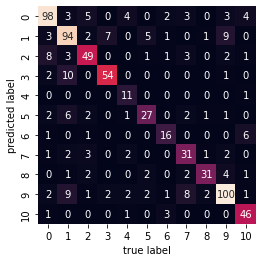

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(y_trues, y_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [80]:
precision = precision_score(y_trues, y_predictions, average = 'weighted')
precision

0.7747494619531506

In [81]:
recall = recall_score(y_trues, y_predictions, average = 'weighted')
recall

0.7704011065006916

In [82]:
f1score = f1_score(y_trues, y_predictions, average= 'weighted')
f1score

0.7694881200338088